In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from scipy.stats import pearsonr

### Linear Regression

In [5]:
np.random.seed(0)
N = 150 

# independent variable
X = 6 * np.random.randn(N) - 3

# output variable
y = 2 * X + np.random.randn(N) * 2

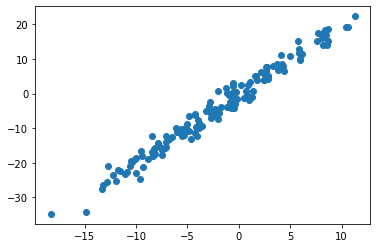

In [6]:
plt.scatter(X , y)

In [8]:
pearsonr?

In [9]:
pearsonr(X, y)

(0.9875364403783591, 9.425001502232295e-121)

In [12]:
X.ndim, y.ndim

(1, 1)

In [15]:
X = X.reshape(-1,1)

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
model.predict(X)

array([ 14.92204354,  -1.35652584,   5.54903973,  20.61330726,
        16.1574199 , -17.79669931,   5.20709705,  -7.93904487,
        -7.36449661,  -1.23190532,  -4.41333241,  11.22472387,
         2.95071037,  -4.680309  ,  -0.83487903,  -2.15002247,
        11.69981734,  -8.58117944,  -2.39596981, -16.32647703,
       -36.60337687,   1.66862518,   4.18480762, -14.99054443,
        20.95777855, -23.49091037,  -5.58639918,  -8.36664847,
        12.16171717,  11.4047718 ,  -4.28319106,  -1.61904021,
       -16.72857916, -29.77404751, -10.2849974 ,  -4.26646315,
         8.55140986,   8.21828424, -10.75542536,  -9.74063314,
       -18.64739259, -23.08095801, -26.49747959,  17.15064898,
       -12.21542172, -11.36111448, -21.08509759,   3.14707832,
       -25.3949831 ,  -8.67167348, -16.82025238,  -1.51472549,
       -12.22918265, -20.22380464,  -6.46890805,  -1.02025131,
        -5.33863672,  -2.52243447, -13.70340108, -10.46198694,
       -14.15859578, -10.42393699, -15.83773082, -26.73

In [17]:
y_pred = model.predict(X)

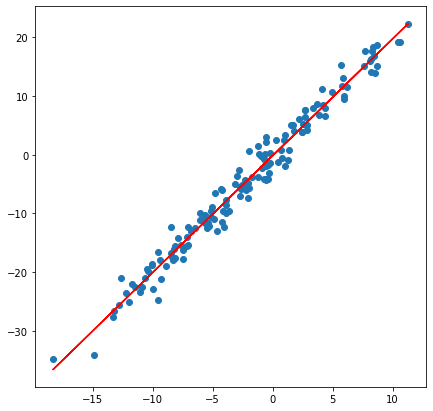

In [19]:
plt.figure(figsize=(7,7))
plt.scatter(X, y)
plt.plot(X, y_pred, c="r")

In [20]:
# import metrics for reggression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
mean_absolute_error(y, y_pred) # mean value difference between true and predicted value

1.5511731242574625

In [23]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(1.5511731242574625, 3.766547108227913)

In [24]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred), r2_score(y, y_pred)

(1.5511731242574625, 3.766547108227913, 0.9752282210751602)

### Polynomial regression

In [27]:
np.random.seed(0)

X = np.arange(-4, 4.1, 0.2)
y =( (X-2)*(X+4)*(X+1)*(X-1)*(X-3) )/14 + np.random.normal(-2.5, 2.5, len(X))

X = X.reshape(-1,1)

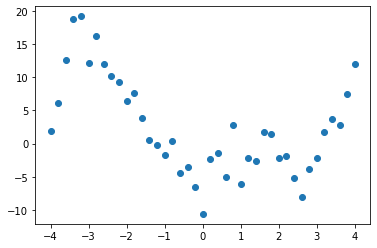

In [28]:
plt.scatter(X, y)

In [29]:
pearsonr(X.flatten(), y) # X suppose to be flattened

(-0.4956786269377843, 0.000982773747795963)

In [30]:
from sklearn.preprocessing import PolynomialFeatures # invrease dimensions of the Data

In [32]:
pf = PolynomialFeatures(degree=4)
X_poly = pf.fit_transform(X)

In [33]:
X[0]

array([-4.])

In [34]:
X_poly[0]

array([  1.,  -4.,  16., -64., 256.])

D=2, R2=0.5697544037009782
D=3, R2=0.6700030934995909
D=4, R2=0.7207373198555
D=5, R2=0.8821376701269633
D=6, R2=0.8821777742034193
D=7, R2=0.8831826910348753


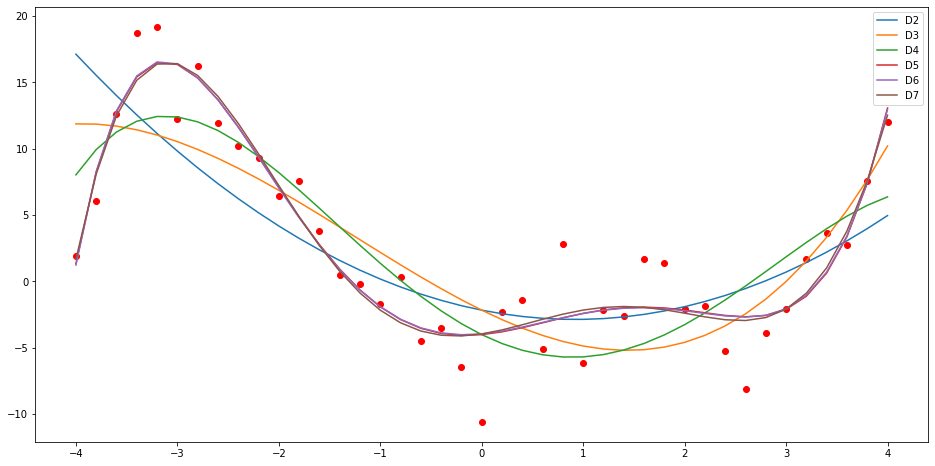

In [36]:
plt.figure(figsize=(16,8))
plt.scatter(X, y, c="r")

for d in range(2,8):
    pf = PolynomialFeatures(degree=d)
    X_poly = pf.fit_transform(X)
    
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    plt.plot(X, y_pred, label=f"D{d}")
    print(f"D={d}, R2={r2_score(y, y_pred)}")
    
plt.legend()
plt.show()

### Multivariate regression

In [37]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")

df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [38]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [39]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [40]:
# converting units imperial -> metrics

df.Height *= 2.54
df.Weight /= 2.2

In [41]:
df

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
...,...,...,...
9995,Female,168.078536,62.171570
9996,Female,170.350573,77.667230
9997,Female,162.224700,58.397872
9998,Female,175.346978,74.478392


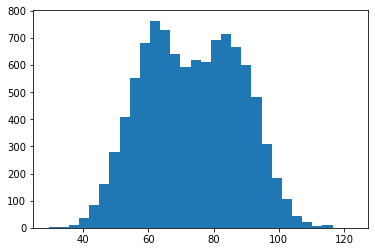

In [42]:
plt.hist(df.Weight, bins=30)
plt.show()

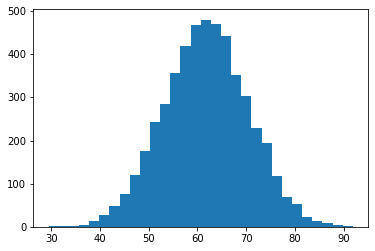

In [44]:
plt.hist(df.query( "Gender == 'Female'").Weight, bins=30)
plt.show()

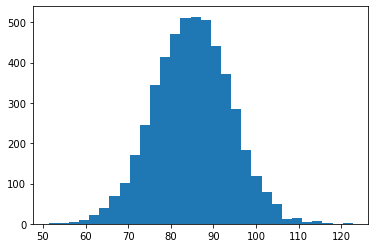

In [45]:
plt.hist(df.query( "Gender == 'Male'").Weight, bins=30)
plt.show()

In [46]:
df

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
...,...,...,...
9995,Female,168.078536,62.171570
9996,Female,170.350573,77.667230
9997,Female,162.224700,58.397872
9998,Female,175.346978,74.478392


In [48]:
df = pd.get_dummies(df)
del(df["Gender_Male"])
df

,Height,Weight,Gender_Female
0,187.571423,109.951620,0
1,174.706036,73.777488,0
2,188.239668,96.700389,0
3,182.196685,100.019305,0
4,177.499761,93.795364,0
...,...,...,...
9995,168.078536,62.171570,1
9996,170.350573,77.667230,1
9997,162.224700,58.397872,1
9998,175.346978,74.478392,1


In [49]:
# changing name of column Gender_Female
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df.head()

,Height,Weight,Gender
0,187.571423,109.951620,0
1,174.706036,73.777488,0
2,188.239668,96.700389,0
3,182.196685,100.019305,0
4,177.499761,93.795364,0


In [51]:
# 0 - male
# 1 - female

model = LinearRegression()
model.fit(df[["Height","Gender"]], df.Weight)

LinearRegression()

In [52]:
model.predict([ [192,0] ])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102.84294991])

In [53]:
model.predict([ [192,0], [165,1], [180,0] ])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([102.84294991,  65.15562029,  90.00771463])